In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data import
data = pd.read_csv('datasets/articles_data_raw.csv')


In [2]:
data.head()

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


In [3]:
data.shape

(10437, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       10437 non-null  int64  
 1   source_id                        10437 non-null  object 
 2   source_name                      10437 non-null  object 
 3   author                           9417 non-null   object 
 4   title                            10435 non-null  object 
 5   description                      10413 non-null  object 
 6   url                              10436 non-null  object 
 7   url_to_image                     9781 non-null   object 
 8   published_at                     10436 non-null  object 
 9   content                          9145 non-null   object 
 10  top_article                      10435 non-null  float64
 11  engagement_reaction_count        10319 non-null  float64
 12  engagement_comment

## Dropping unnecessary columns

In [5]:
data.drop(columns = ['author','description','url', 'url_to_image', 'content'], inplace=True)

In [6]:
source_info = data[['source_id','source_name']].drop_duplicates()
source_info.rename(columns = {'source_id':'id', 'source_name':'name'}, inplace=True)
source_info.set_index('id', inplace=True)
source_info

,name
id,
reuters,Reuters
the-irish-times,The Irish Times
al-jazeera-english,Al Jazeera English
bbc-news,BBC News
abc-news,ABC News
the-new-york-times,The New York Times
cnn,CNN
cbs-news,CBS News
newsweek,Newsweek


In [7]:
#checking for unexpected value (1)

In [8]:
source_1 = data[data['source_id'] == "1"]
source_1

,Unnamed: 0,source_id,source_name,title,published_at,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
750,750,1,460.0,352.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Must be some sort of error, dropping it

In [10]:
data.drop(source_1.index, inplace=True)
source_info.drop("1", inplace=True)

In [11]:
#Are there any other "low volume" sources?

In [12]:
def getArticlesCount():
    return data.groupby('source_id')['title'].count()

In [13]:
source_info['articles'] = getArticlesCount()
source_info

,name,articles
id,,
reuters,Reuters,1252
the-irish-times,The Irish Times,1232
al-jazeera-english,Al Jazeera English,499
bbc-news,BBC News,1242
abc-news,ABC News,1139
the-new-york-times,The New York Times,984
cnn,CNN,1132
cbs-news,CBS News,952
newsweek,Newsweek,539


In [14]:
#No, let's drop reduntant column

In [15]:
data.drop(columns = ['source_name'],inplace=True)
data

,Unnamed: 0,source_id,title,published_at,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,NTSB says Autopilot engaged in 2018 California...,2019-09-03T16:22:20Z,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,Unemployment falls to post-crash low of 5.2%,2019-09-03T10:32:28Z,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,"Louise Kennedy AW2019: Long coats, sparkling t...",2019-09-03T14:40:00Z,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,North Korean footballer Han joins Italian gian...,2019-09-03T17:25:39Z,0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,UK government lawyer says proroguing parliamen...,2019-09-03T14:39:21Z,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10432,10432,abc-news,Drop in US service sector activity raises econ...,2019-10-03T16:30:16Z,0.0,0.0,0.0,0.0,0.0
10433,10433,reuters,Banker defections pose challenge for Credit Su...,2019-10-03T15:59:52Z,0.0,0.0,0.0,627.0,0.0
10434,10434,cnn,"A 5-year-old cancer survivor donates 3,000 toy...",2019-10-03T11:20:06Z,0.0,4072.0,179.0,466.0,0.0
10435,10435,cbs-news,Fateful Connection,2019-10-03T16:40:03Z,0.0,0.0,0.0,0.0,0.0


In [16]:
#Also getting rid of the date of publication
data['published_at'] = data['published_at'].map(lambda x : x.split('T')[1])

## Changing column names and dtypes

In [17]:
data.rename(columns = {'Unnamed: 0':'id',
                    'published_at': 'timestamp',
                    'engagement_reaction_count': 'reactions',
                    'engagement_comment_count': 'comments',
                    'engagement_share_count': 'shares',
                    'engagement_comment_plugin_count': 'comment_plugin'}, inplace=True)
data.set_index('id', inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10436 entries, 0 to 10436
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   source_id       10436 non-null  object 
 1   title           10434 non-null  object 
 2   date            10436 non-null  object 
 3   top_article     10435 non-null  float64
 4   reactions       10319 non-null  float64
 5   comments        10319 non-null  float64
 6   shares          10319 non-null  float64
 7   comment_plugin  10319 non-null  float64
dtypes: float64(5), object(3)
memory usage: 733.8+ KB


In [19]:
#Choosing approptiate dtypes

In [20]:
data['top_article'].head(10) #tihs is a boolean

id
0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: top_article, dtype: float64

In [21]:
data['top_article'] = data['top_article'].astype('bool')

In [22]:
#All the other objects are actually strings

In [23]:
objcol = data.select_dtypes('object').columns
data[objcol] = data[objcol].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10436 entries, 0 to 10436
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   source_id       10436 non-null  string 
 1   title           10434 non-null  string 
 2   date            10436 non-null  string 
 3   top_article     10436 non-null  bool   
 4   reactions       10319 non-null  float64
 5   comments        10319 non-null  float64
 6   shares          10319 non-null  float64
 7   comment_plugin  10319 non-null  float64
dtypes: bool(1), float64(4), string(3)
memory usage: 662.4 KB


In [24]:
data.head()

,source_id,title,date,top_article,reactions,comments,shares,comment_plugin
id,,,,,,,,
0,reuters,NTSB says Autopilot engaged in 2018 California...,16:22:20Z,False,0.0,0.0,2528.0,0.0
1,the-irish-times,Unemployment falls to post-crash low of 5.2%,10:32:28Z,False,6.0,10.0,2.0,0.0
2,the-irish-times,"Louise Kennedy AW2019: Long coats, sparkling t...",14:40:00Z,True,NaN,NaN,NaN,NaN
3,al-jazeera-english,North Korean footballer Han joins Italian gian...,17:25:39Z,False,0.0,0.0,7.0,0.0
4,bbc-news,UK government lawyer says proroguing parliamen...,14:39:21Z,False,0.0,0.0,0.0,0.0


## Dealing with nulls

<AxesSubplot:ylabel='id'>

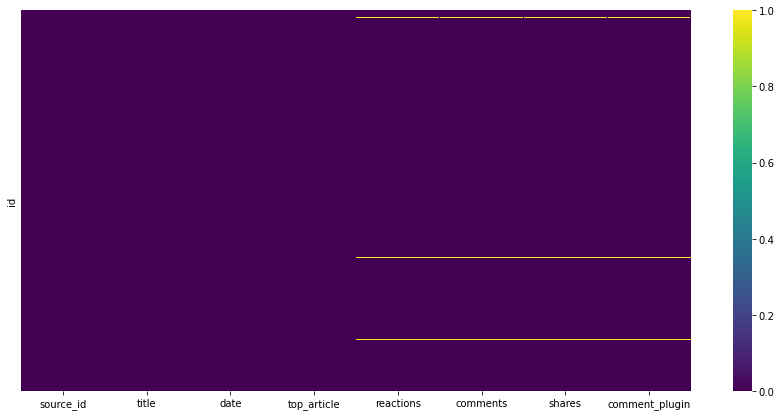

In [25]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(data.isnull(), yticklabels=False,cmap="viridis")

In [26]:
fig.savefig('img/nulls_heatmap.jpg', bbox_inches='tight')

In [27]:
#There are very few nulls and they all belong to the same 3 articles. Lets drop those articles

In [28]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10317 entries, 0 to 10436
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   source_id       10317 non-null  string 
 1   title           10317 non-null  string 
 2   date            10317 non-null  string 
 3   top_article     10317 non-null  bool   
 4   reactions       10317 non-null  float64
 5   comments        10317 non-null  float64
 6   shares          10317 non-null  float64
 7   comment_plugin  10317 non-null  float64
dtypes: bool(1), float64(4), string(3)
memory usage: 654.9 KB


## Updating and saving

In [29]:
#We saved approx 600KB!

In [30]:
data.to_csv('datasets/articles_data_clean.csv', index=True, encoding='utf-8')

In [31]:
source_info['articles'] = getArticlesCount()
source_info.to_csv('datasets/source_info.csv', index=True, encoding='utf-8')